In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [ ]:
data = {
    "X": [2,2,8,5,7,6,1,4,2],
    "Y": [10,5,4,8,5,4,2,9,4]
}
df = pd.DataFrame(data)


In [56]:
test_df= pd.DataFrame({
    "X": [6],
    "Y": [6]
})

<Axes: xlabel='X', ylabel='Y'>

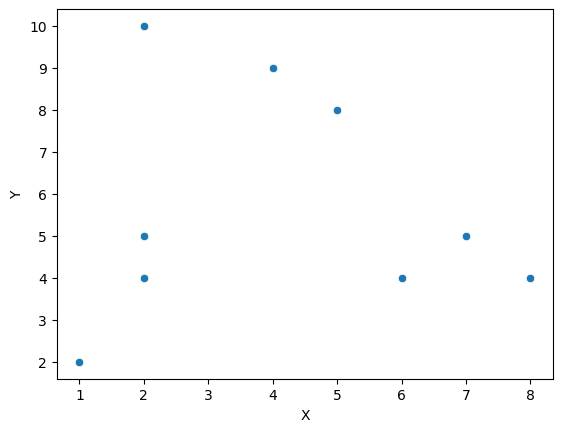

In [55]:
sns.scatterplot(data= df, x="X", y="Y")

In [47]:
kmeans = KMeans(n_clusters=3, random_state=0)
df["Cluster_Num"] = kmeans.fit_predict(df[["X","Y"]])


In [48]:
cluster_names = {0: "C1", 1: "C2", 2: "C3"}
df["Cluster"] = df["Cluster_Num"].map(cluster_names)




In [49]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=["X","Y"])
centroids["Cluster"] = ["C1","C2","C3"]

In [50]:
print("centroids:\n", centroids, "\n")
print(df[["X","Y","Cluster"]])

centroids:
           X         Y Cluster
0  7.000000  4.333333      C1
1  1.666667  3.666667      C2
2  3.666667  9.000000      C3 

   X   Y Cluster
0  2  10      C3
1  2   5      C2
2  8   4      C1
3  5   8      C3
4  7   5      C1
5  6   4      C1
6  1   2      C2
7  4   9      C3
8  2   4      C2


In [51]:
z = pd.DataFrame([[6,6]], columns=["X","Y"])
z_cluster_num = kmeans.predict(z)[0]
z_cluster_name = cluster_names[z_cluster_num]

In [52]:
z_cluster_name

'C1'

In [ ]:
sse= []
for k in range(1,3):
    kmeans=KMeans(n_clusters= k)
    kmeans.fit_predict(test_df[[x="X", y="Y"]])
    sse.append(kmeans.inertia_)
    print("")

In [64]:
X,y=make_blobs(n_samples= 300, n_features=2, centers=3, cluster_std=1.1)

<Axes: >

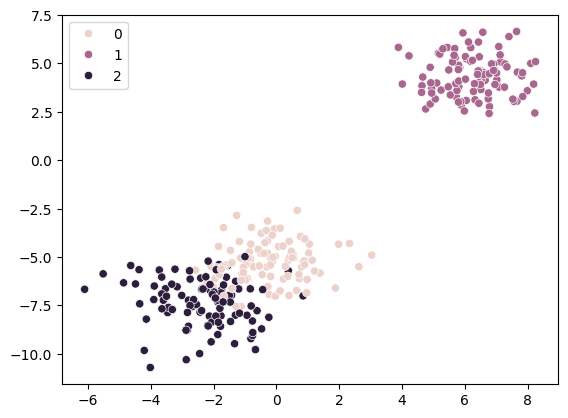

In [65]:
sns.scatterplot(x= X[:, 0], y= X[:,1], hue=y)

In [66]:
wcss= []
for k in range(1, 11):
    kmeans= KMeans(n_clusters= k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    

<Axes: >

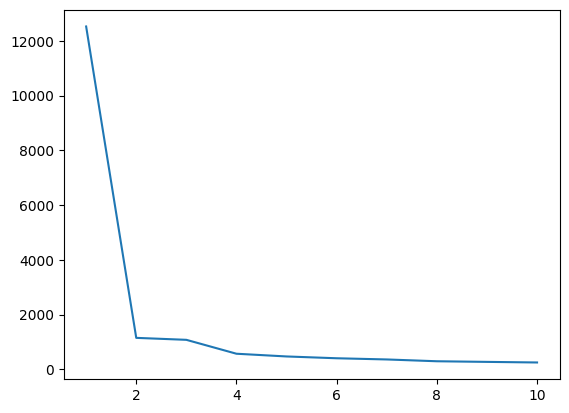

In [67]:
sns.lineplot(y=wcss, x=list(range(1,11)))

In [68]:
k_mean= KMeans(n_clusters= 4)
k_mean.fit(X)
k_mean.predict(X)

array([0, 3, 0, 3, 3, 0, 2, 1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2,
       0, 3, 1, 0, 2, 0, 2, 1, 3, 2, 0, 2, 3, 3, 3, 3, 2, 0, 2, 3, 3, 0,
       3, 2, 1, 3, 2, 1, 3, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 3, 0, 3, 0,
       1, 1, 1, 1, 1, 1, 2, 0, 3, 3, 2, 0, 0, 3, 0, 3, 0, 3, 3, 3, 1, 0,
       2, 3, 0, 3, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3,
       3, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 3, 0, 3, 3, 0, 3, 1, 1, 0,
       1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 3, 2, 1, 1, 1, 1, 3, 0, 0, 0, 0,
       3, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 3, 1,
       3, 1, 2, 0, 0, 1, 3, 3, 0, 0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 3, 1, 1, 0, 0, 3, 0, 0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 3, 1, 1, 1, 0, 3, 3, 2, 0, 1, 0, 0, 1, 1, 3, 3, 2, 1, 0, 0, 3,
       0, 3, 3, 1, 0, 0, 2, 1, 3, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 3, 0, 1, 3, 3, 3, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 1,
       2, 1, 3, 0, 0, 3, 1, 1, 2, 3, 1, 0, 2, 0], d

In [70]:
df=pd.DataFrame(X, columns=["X", "Y"])
df["Y"]=y
df["y_pred"]=k_mean.predict(X)

In [71]:
df.sample(10)

,X,Y,y_pred
78,-1.687867,0,0
79,-1.500499,2,3
110,-0.037875,0,3
236,-1.945388,2,3
154,-2.175595,2,3
83,-0.437654,2,3
157,5.940910,1,1
96,6.535546,1,1
86,4.898298,1,1
123,-1.764555,2,3
